In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [ ]:
folder_path = '/content/drive/MyDrive/DATA_255/LAB1_part3/input_dir/Train Image1/TI/train images 1'
csv_path = '/content/drive/MyDrive/DATA_255/LAB1_part3/input_dir/train_df.csv'

df = pd.read_csv(csv_path) # Loading the file

In [ ]:
image_files = os.listdir(folder_path)
train_df_filtered = df[df['ImageId'].isin(image_files)] # Filter based on the ImageId column

In [ ]:
train_df_filtered.shape

(29960, 3)

In [ ]:
# Separating filtered dataframe into three dataframes based num of ships
df_zero_ships = train_df_filtered.groupby('ImageId').filter(lambda x: x['EncodedPixels'].isnull().all())
df_one_ships = train_df_filtered.groupby('ImageId').filter(lambda x: x['EncodedPixels'].notnull().sum() == 1)
df_two_ships = train_df_filtered.groupby('ImageId').filter(lambda x: x['EncodedPixels'].notnull().sum() == 2)

6.	Plot some of the random images from train set having 0, 1 and 2 ships (can figure out from the train_df.csv file) (1 points)


Displaying Images - having Number of ships=0

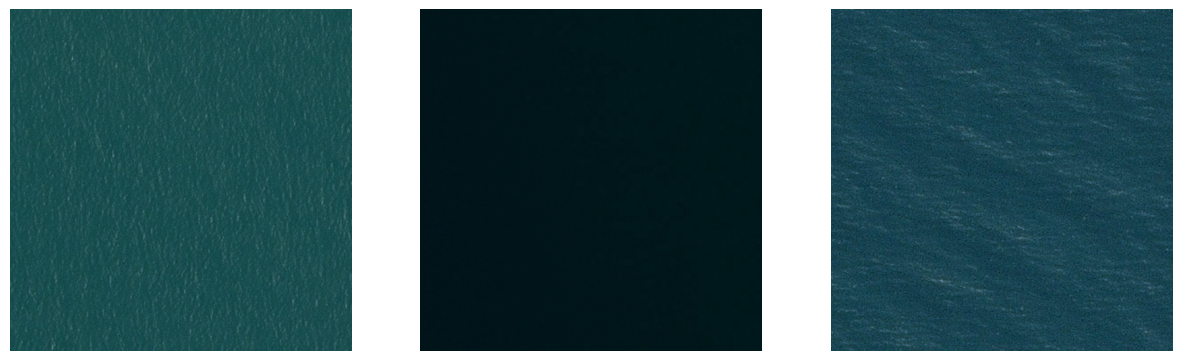

In [ ]:
sample_size = 3
sampled_images_zero_ships = np.random.choice(df_zero_ships['ImageId'].unique(), size=sample_size, replace=False)

# Plotting images based on the num of ships
fig, axs = plt.subplots(1, len(sampled_images_zero_ships), figsize=(15, 9))
for i, image_path in enumerate(sampled_images_zero_ships):
    if image_path in df_zero_ships['ImageId'].unique():
        img_path = '/content/drive/MyDrive/DATA_255/LAB1_part3/input_dir/Train Image1/TI/train images 1/' + image_path
        img = mpimg.imread(img_path)
        axs[i].imshow(img)
        axs[i].axis('off')
plt.show()

`Displaying Images - having Number of ships=1`

In [ ]:
from PIL import Image

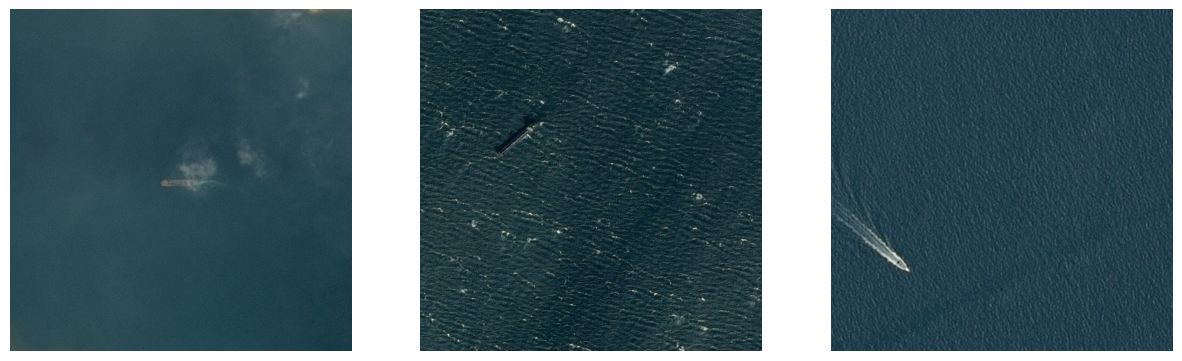

In [ ]:
sampled_images_one_ship = np.random.choice(df_one_ships['ImageId'].unique(), size=sample_size, replace=False)
fig, axs = plt.subplots(1, len(sampled_images_one_ship), figsize=(15, 9))
for i, image_path in enumerate(sampled_images_one_ship):
    if image_path in df_one_ships['ImageId'].unique():
        image = Image.open(os.path.join(folder_path, image_path))
        axs[i].imshow(image)
        axs[i].axis('off')

`Displaying Images - having Number of ships=2`

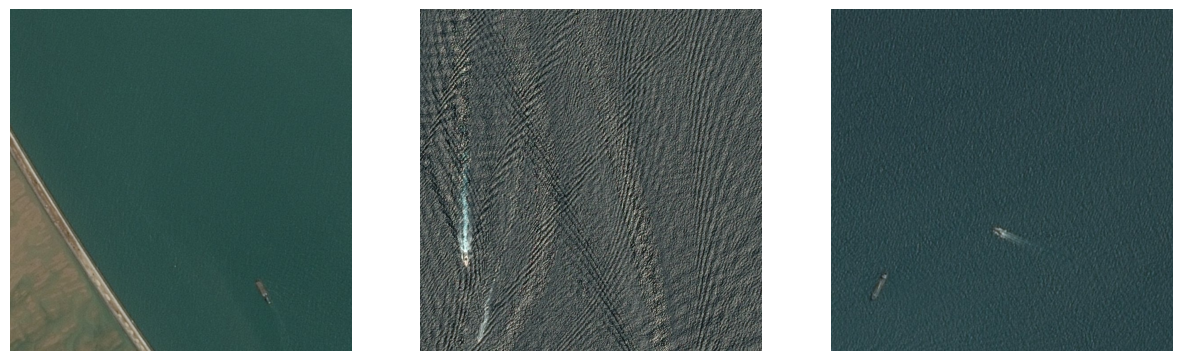

In [ ]:
sampled_images_two_ships = np.random.choice(df_two_ships['ImageId'].unique(), size=sample_size, replace=False)
fig, axs = plt.subplots(1, len(sampled_images_two_ships), figsize=(15, 9))
for i, image_path in enumerate(sampled_images_two_ships):
    if image_path in df_two_ships['ImageId'].unique():
        image = Image.open(os.path.join(folder_path, image_path))
        axs[i].imshow(image)
        axs[i].axis('off')

In [ ]:
def rle_decode(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    ends = starts + lengths
    mask = np.zeros(np.prod(shape), dtype=np.uint8)
    for start, end in zip(starts, ends):
        mask[start:end] = 1
    mask = mask.reshape(shape[::-1]).T  # flip and transpose
    return mask

In [ ]:
image_ids_to_highlight = []
for image in sampled_images_two_ships:
  image_ids_to_highlight.append(image)
for i in sampled_images_one_ship:
  image_ids_to_highlight.append(i)

In [ ]:
# Filtering dataframe include rows with ImageIds which are in image_ids_to_highlight
filtered_ship_df = df[df['ImageId'].isin(image_ids_to_highlight)]
filtered_ship_df.head()

Unnamed: 0        ImageId  \
1633         1633  0227e4755.jpg   
4623         4623  05ec547c3.jpg   
16985       16985  1676c8e96.jpg   
16986       16986  1676c8e96.jpg   
79854       79854  68e56cc63.jpg   

                                           EncodedPixels  
1633   259197 20 259965 20 260733 20 261501 20 262269...  
4623   113468 1 114235 3 115002 5 115768 7 116535 9 1...  
16985  74276 5 75044 13 75812 22 76579 31 77347 36 78...  
16986       100585 4 101353 7 102120 8 102888 7 103660 3  
79854  66699 1 67465 3 68231 6 68997 8 69763 11 70529...

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.imread('/content/drive/MyDrive/DATA_255/LAB1_part3/input_dir/Train Image1/TI/train images 1/149e2f701.jpg')
height, width, channels = image.shape  # Getting size of the image
print(f"Image size: {width} x {height}")   # image size

Image size: 768 x 768


7.	Highlight the area having ship in the images (using the pixel information from the train_df.csv) (5 points)


In [ ]:
def decode_pixels(pixels):     #decoding encoded pixels
    mask = np.zeros(768*768, dtype=bool)
    pixels = pixels.split()
    for i in range(0, len(pixels), 2):
        start = int(pixels[i])
        length = int(pixels[i+1])
        mask[start:start+length] = 1
    mask = mask.reshape(768, 768)
    return np.transpose(mask)

In [ ]:
# highlight images over the area with ships
for image_id in image_ids_to_highlight:
    image_path = f"/content/drive/MyDrive/DATA_255/LAB1/Train Image1/TI/train images 1/{image_id}"
    if not os.path.exists(image_path):
        continue
    image = cv2.imread(image_path)
    pixels = filtered_ship_df.loc[filtered_ship_df['ImageId'] == image_id]['EncodedPixels'].values #Mask for ship pixels
    mask_uint8 = np.zeros((768, 768), dtype=np.uint8);
    for pixel in pixels:
      mask = decode_pixels(pixel)
      mask_uint8 = mask_uint8 + mask.astype(np.uint8)
    image_with_mask = cv2.addWeighted(image, 0.6, cv2.merge((255*mask_uint8, np.zeros_like(mask_uint8), np.zeros_like(mask_uint8))), 0.4, 0)
    cv2_imshow(image_with_mask) # displaying masked images

8.	Plot some of the random test set images (2 points)


In [ ]:
test_folder_path = '/content/drive/MyDrive/DATA_255/LAB1_part3/input_dir/Test Image/untitled folder/test images 2'

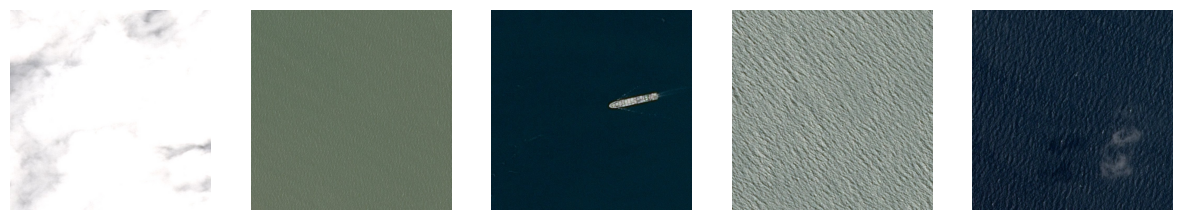

In [ ]:
num = 5. # num of images to be displayed
test_images = os.listdir(test_folder_path). #getting image files in folder
random_files = random.sample(test_images, num)
# Plotting selected images
fig, axs = plt.subplots(nrows=1, ncols=num, figsize=(15, 5))
for i, image_file in enumerate(random_files):
    image_path = os.path.join(test_folder_path, image_file)
    image = imread(image_path)
    axs[i].imshow(image)
    axs[i].axis('off')
plt.show()

9. Perform object detection

In [ ]:
BATCH_SIZE = 32
EDGE_CROP = 16
GAUSSIAN_NOISE = 0.1
UPSAMPLE_MODE = 'SIMPLE'
# downsampling inside the network
NET_SCALING = (1, 1)
# downsampling in preprocessing
IMG_SCALING = (3, 3)
# number of validation images to use
VALID_IMG_COUNT = 900
# maximum number of steps_per_epoch in training
MAX_TRAIN_STEPS = 7
MAX_TRAIN_EPOCHS = 40
AUGMENT_BRIGHTNESS = False

In [ ]:
import os
from skimage.io import imread
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from skimage.segmentation import mark_boundaries
from skimage.util import montage as montage
from skimage.morphology import binary_opening, disk, label
import gc; gc.enable()

In [ ]:
montage_rgb = lambda x: np.stack([montage(x[:, :, :, i]) for i in range(x.shape[3])], -1)
ship_dir = '/content/drive/MyDrive/DATA_255/LAB1_part3'
train_image_dir = '/content/drive/MyDrive/DATA_255/LAB1_part3/input_dir/Train Image1/TI/train images 1'
test_image_dir = os.path.join('/content/drive/MyDrive/DATA_255/LAB1_part3/input_dir/Test Image/untitled folder/test images 2')

In [ ]:
def multi_rle_encode(img, **kwargs):
    labels = label(img)
    if img.ndim > 2:
        return [rle_encode(np.sum(labels==k, axis=2), **kwargs) for k in np.unique(labels[labels>0])]
    else:
        return [rle_encode(labels==k, **kwargs) for k in np.unique(labels[labels>0])]
def rle_encode(img, min_max_threshold=1e-3, max_mean_threshold=None):
    if np.max(img) < min_max_threshold:
        return ''
    if max_mean_threshold and np.mean(img) > max_mean_threshold:
        return '' # ignore overfilled mask
    pixels = img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def rle_decode(mask_rle, shape=(768, 768)):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

def masks_as_image(in_mask_list):
    all_masks = np.zeros((768, 768), dtype = np.uint8)
    for mask in in_mask_list:
        if isinstance(mask, str):
            all_masks |= rle_decode(mask)
    return all_masks

def masks_as_color(in_mask_list):
    all_masks = np.zeros((768, 768), dtype = np.float)
    scale = lambda x: (len(in_mask_list)+x+1) / (len(in_mask_list)*2) ## scale the heatmap image to shift
    for i,mask in enumerate(in_mask_list):
        if isinstance(mask, str):
            all_masks[:,:] += scale(i) * rle_decode(mask)
    return all_masks

In [ ]:
masks = pd.read_csv(os.path.join('/content/drive/MyDrive/DATA_255/LAB1_part3/input_dir/train_df.csv'))
not_empty = pd.notna(masks.EncodedPixels)
print(not_empty.sum(), 'masks in', masks[not_empty].ImageId.nunique(), 'images')
print((~not_empty).sum(), 'empty images in', masks.ImageId.nunique(), 'total images')
masks.head()

68673 masks in 35812 images
125935 empty images in 161747 total images


Unnamed: 0        ImageId  \
0           0  00003e153.jpg   
1           1  0001124c7.jpg   
2           2  000155de5.jpg   
3           3  0001b1832.jpg   
4           4  00021ddc3.jpg   

                                       EncodedPixels  
0                                                NaN  
1                                                NaN  
2  264661 17 265429 33 266197 33 266965 33 267733...  
3                                                NaN  
4  108287 1 109054 3 109821 4 110588 5 111356 5 1...

<ipython-input-38-d1cc90e83a4d>:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_masks = np.zeros((768, 768), dtype = np.float)


Check Decoding->Encoding RLE_0: 9 -> RLE_1: 4
0 error


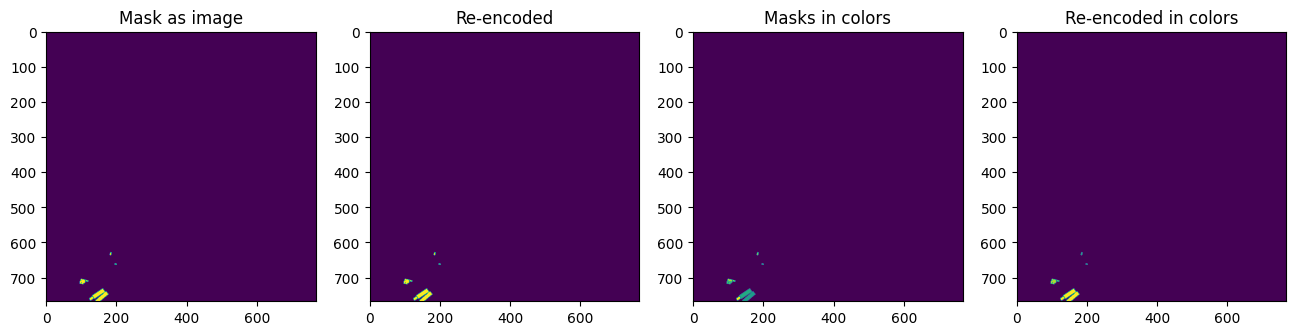

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (16, 5))
rle_0 = masks.query('ImageId=="00021ddc3.jpg"')['EncodedPixels']
img_0 = masks_as_image(rle_0)
ax1.imshow(img_0)
ax1.set_title('Mask as image')
rle_1 = multi_rle_encode(img_0)
img_1 = masks_as_image(rle_1)
ax2.imshow(img_1)
ax2.set_title('Re-encoded')
img_c = masks_as_color(rle_0)
ax3.imshow(img_c)
ax3.set_title('Masks in colors')
img_c = masks_as_color(rle_1)
ax4.imshow(img_c)
ax4.set_title('Re-encoded in colors')
print('Check Decoding->Encoding',
      'RLE_0:', len(rle_0), '->',
      'RLE_1:', len(rle_1))
print(np.sum(img_0 - img_1), 'error')

In [ ]:
#training and validation

In [ ]:
masks['ships'] = masks['EncodedPixels'].map(lambda c_row: 1 if isinstance(c_row, str) else 0)
unique_img_ids = masks.groupby('ImageId').agg({'ships': 'sum'}).reset_index()
unique_img_ids['has_ship'] = unique_img_ids['ships'].map(lambda x: 1.0 if x>0 else 0.0)
unique_img_ids['has_ship_vec'] = unique_img_ids['has_ship'].map(lambda x: [x])
unique_img_ids = unique_img_ids[unique_img_ids['ImageId'].isin(os.listdir('/content/drive/MyDrive/DATA_255/LAB1_part3/input_dir/Train Image1/TI/train images 1'))] # filtering images which are not present in the directory
# some files are too small/corrupt
unique_img_ids['file_size_kb'] = unique_img_ids['ImageId'].map(lambda c_img_id:
                                                               os.stat(os.path.join('/content/drive/MyDrive/DATA_255/LAB1_part3/input_dir/Train Image1/TI/train images 1',
                                                                                    c_img_id)).st_size/1024)
masks.drop(['ships'], axis=1, inplace=True)
unique_img_ids.sample(7)

ImageId  ships  has_ship has_ship_vec  file_size_kb
105044  a6557e6d1.jpg      1       1.0        [1.0]     82.801758
13964   162b245cc.jpg      1       1.0        [1.0]    168.246094
55419   57d63c348.jpg      0       0.0        [0.0]    106.875000
48313   4c9379893.jpg      0       0.0        [0.0]    111.639648
128783  cbe74a8a4.jpg      1       1.0        [1.0]     98.047852
52783   53b036c99.jpg      0       0.0        [0.0]    100.732422
17516   1bbfacc25.jpg      1       1.0        [1.0]    151.324219

<Axes: >

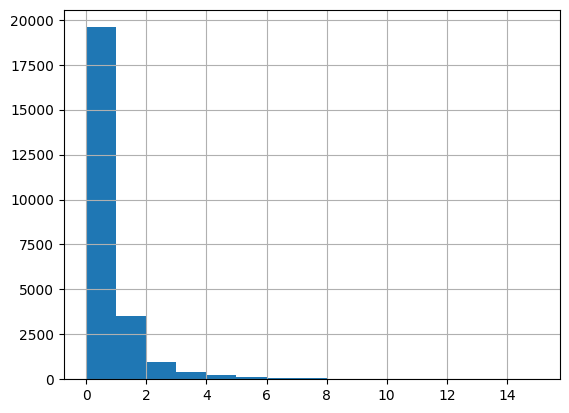

In [ ]:
unique_img_ids['ships'].hist(bins=unique_img_ids['ships'].max())

5971 masks


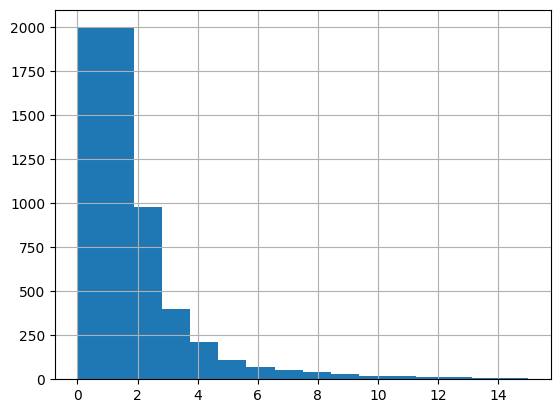

In [ ]:
#Empty Images -- Undersample
SAMPLES_PER_GROUP = 2000
balanced_train_df = unique_img_ids.groupby('ships').apply(lambda x: x.sample(SAMPLES_PER_GROUP) if len(x) > SAMPLES_PER_GROUP else x)
balanced_train_df['ships'].hist(bins=balanced_train_df['ships'].max()+1)
print(balanced_train_df.shape[0], 'masks')

In [ ]:
from sklearn.model_selection import train_test_split
train_ids, valid_ids = train_test_split(balanced_train_df,
                 test_size = 0.3,
                 stratify = balanced_train_df['ships'])
train_df = pd.merge(masks, train_ids)
valid_df = pd.merge(masks, valid_ids)
print(train_df.shape[0], 'training masks')
print(valid_df.shape[0], 'validation masks')

7592 training masks
3261 validation masks


In [ ]:
def make_image_gen(in_df, batch_size = BATCH_SIZE):
    all_batches = list(in_df.groupby('ImageId'))
    out_rgb = []
    out_mask = []
    while True:
        np.random.shuffle(all_batches)
        for c_img_id, c_masks in all_batches:
            rgb_path = os.path.join(train_image_dir, c_img_id)
            c_img = imread(rgb_path)
            c_mask = np.expand_dims(masks_as_image(c_masks['EncodedPixels'].values), -1)
            if IMG_SCALING is not None:
                c_img = c_img[::IMG_SCALING[0], ::IMG_SCALING[1]]
                c_mask = c_mask[::IMG_SCALING[0], ::IMG_SCALING[1]]
            out_rgb += [c_img]
            out_mask += [c_mask]
            if len(out_rgb)>=batch_size:
                yield np.stack(out_rgb, 0)/255.0, np.stack(out_mask, 0)
                out_rgb, out_mask=[], []

In [ ]:
train_gen = make_image_gen(train_df)
train_x, train_y = next(train_gen)
print('x', train_x.shape, train_x.min(), train_x.max())
print('y', train_y.shape, train_y.min(), train_y.max())

x (32, 256, 256, 3) 0.0 1.0
y (32, 256, 256, 1) 0 1


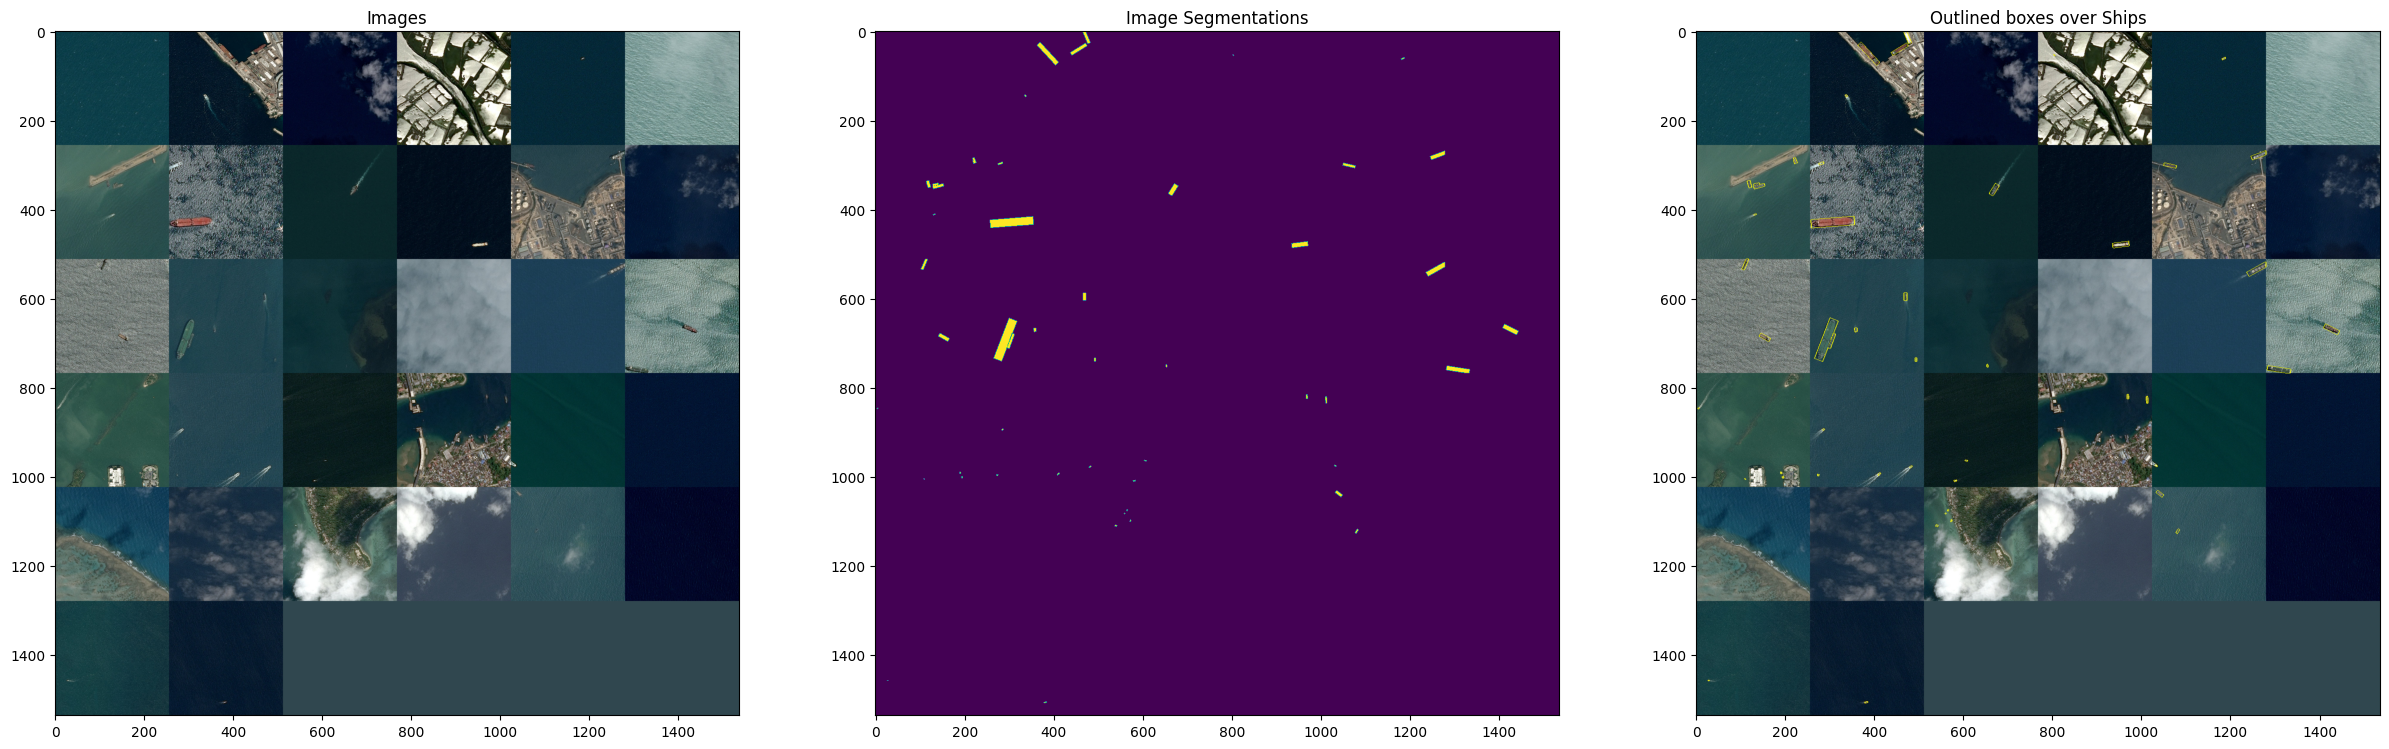

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 10))
batch_rgb = montage_rgb(train_x)
batch_seg = montage(train_y[:, :, :, 0])
ax1.imshow(batch_rgb)
ax1.set_title('Images')
ax2.imshow(batch_seg)
ax2.set_title('Image Segmentations')
ax3.imshow(mark_boundaries(batch_rgb,
                           batch_seg.astype(int)))
ax3.set_title('Outlined boxes over Ships')
fig.savefig('overview.png')

In [ ]:
#Validation Set
%%time
valid_x, valid_y = next(make_image_gen(valid_df, VALID_IMG_COUNT))
print(valid_x.shape, valid_y.shape)

(900, 256, 256, 3) (900, 256, 256, 1)
CPU times: user 9.58 s, sys: 1.97 s, total: 11.6 s
Wall time: 9min 48s


In [ ]:
test_gen = make_image_gen(valid_df)
valid_x, valid_y = next(test_gen)
print('x', valid_x.shape, valid_x.min(), valid_x.max())
print('y', valid_y.shape, valid_y.min(), valid_y.max())

x (32, 256, 256, 3) 0.0 1.0
y (32, 256, 256, 1) 0 1


In [ ]:
#Augment Data
from keras.preprocessing.image import ImageDataGenerator
dg_args = dict(featurewise_center = False,
                  samplewise_center = False,
                  rotation_range = 45,
                  width_shift_range = 0.1,
                  height_shift_range = 0.1,
                  shear_range = 0.01,
                  zoom_range = [0.9, 1.25],
                  horizontal_flip = True,
                  vertical_flip = True,
                  fill_mode = 'reflect',
                   data_format = 'channels_last')
if AUGMENT_BRIGHTNESS:
    dg_args[' brightness_range'] = [0.5, 1.5]
image_gen = ImageDataGenerator(**dg_args)
if AUGMENT_BRIGHTNESS:
    dg_args.pop('brightness_range')
label_gen = ImageDataGenerator(**dg_args)
def create_aug_gen(in_gen, seed = None):
    np.random.seed(seed if seed is not None else np.random.choice(range(9999)))
    for in_x, in_y in in_gen:
        seed = np.random.choice(range(9999))
        g_x = image_gen.flow(255*in_x,
                             batch_size = in_x.shape[0],
                             seed = seed,
                             shuffle=True)
        g_y = label_gen.flow(in_y,
                             batch_size = in_x.shape[0],
                             seed = seed,
                             shuffle=True)
        yield next(g_x)/255.0, next(g_y)

x (32, 256, 256, 3) float32 0.0 1.0
y (32, 256, 256, 1) float32 0.0 1.0


Text(0.5, 1.0, 'colored ship boxes')

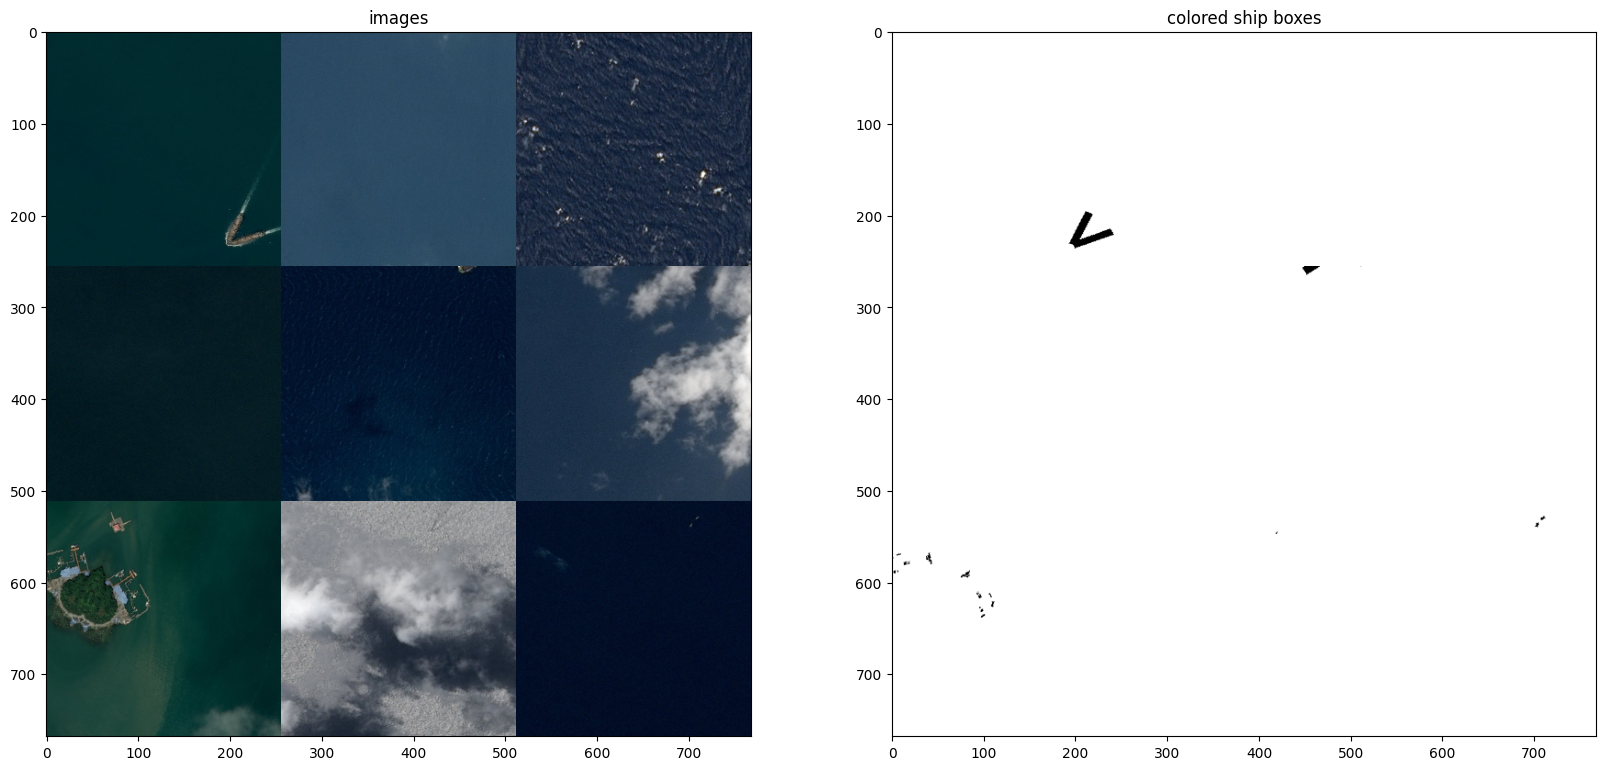

In [ ]:
cur_gen = create_aug_gen(train_gen)
t_x, t_y = next(cur_gen)
print('x', t_x.shape, t_x.dtype, t_x.min(), t_x.max())
print('y', t_y.shape, t_y.dtype, t_y.min(), t_y.max())
# only keep first 9 samples to examine in detail
t_x = t_x[:9]
t_y = t_y[:9]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.imshow(montage_rgb(t_x), cmap='gray')
ax1.set_title('images')
ax2.imshow(montage(t_y[:, :, :, 0]), cmap='gray_r')
ax2.set_title('colored ship boxes')

In [ ]:
gc.collect()

131

In [ ]:
from keras import models, layers
def upsample_conv(filters, kernel_size, strides, padding):
    return layers.Conv2DTranspose(filters, kernel_size, strides=strides, padding=padding)
def upsample_simple(filters, kernel_size, strides, padding):
    return layers.UpSampling2D(strides)
if UPSAMPLE_MODE=='DECONV':
    upsample=upsample_conv
else:
    upsample=upsample_simple
input_img = layers.Input(t_x.shape[1:], name = 'RGB_Input')
pp_in_layer = input_img
if NET_SCALING is not None:
    pp_in_layer = layers.AvgPool2D(NET_SCALING)(pp_in_layer)
pp_in_layer = layers.GaussianNoise(GAUSSIAN_NOISE)(pp_in_layer)
pp_in_layer = layers.BatchNormalization()(pp_in_layer)

c1 = layers.Conv2D(8, (3, 3), activation='relu', padding='same') (pp_in_layer)
c1 = layers.Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = layers.MaxPooling2D((2, 2)) (c1)

c2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = layers.MaxPooling2D((2, 2)) (c2)

c3 = layers.Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = layers.Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = layers.MaxPooling2D((2, 2)) (c3)

c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = layers.MaxPooling2D(pool_size=(2, 2)) (c4)


c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same') (p4)
c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

u6 = upsample(64, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = layers.concatenate([u6, c4])
c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u7 = upsample(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = layers.concatenate([u7, c3])
c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = upsample(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = layers.concatenate([u8, c2])
c8 = layers.Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = layers.Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = upsample(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = layers.concatenate([u9, c1], axis=3)
c9 = layers.Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = layers.Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

d = layers.Conv2D(1, (1, 1), activation='sigmoid') (c9)
if NET_SCALING is not None:
    d = layers.UpSampling2D(NET_SCALING)(d)
seg_model = models.Model(inputs=[input_img], outputs=[d])
seg_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 RGB_Input (InputLayer)      [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 average_pooling2d (Average  (None, 256, 256, 3)          0         ['RGB_Input[0][0]']           
 Pooling2D)                                                                                       
                                                                                                  
 gaussian_noise (GaussianNo  (None, 256, 256, 3)          0         ['average_pooling2d[0][0]']   
 ise)                                                                                             
                                                                                              

In [ ]:
import keras.backend as K
import tensorflow as tf
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

In [ ]:
def custom_loss(y_true, y_pred):
    focal = focal_loss()
    IoU = IoU_loss()
    return 0.995*IoU(y_true, y_pred) + 0.005*focal(y_true, y_pred)
def focal_loss(gamma=2., alpha=.25, eps=1e-7):
    def focal_loss_fixed(y_true, y_pred):
        y_pred = K.clip(y_pred, eps, 1.0-eps) # improve the stability
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        fl_1 = -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1), axis=[1,2,3])
        fl_0 = -K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0), axis=[1,2,3])
        return K.mean(fl_0 + fl_1, axis=0)
    return focal_loss_fixed
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)
def dice_p_bce(in_gt, in_pred):
    return binary_crossentropy(in_gt, in_pred) - K.log(dice_coef(in_gt, in_pred))
# TP rate
def true_positive_rate(y_true, y_pred):
    return K.sum(K.flatten(y_true) * K.flatten(K.round(y_pred))) / K.sum(y_true)
# IOU
def IoU_loss(eps=1e-6):
    def IoU(y_true, y_pred):
        if np.max(y_true) == 0.0:
            return IoU(1-y_true, 1-y_pred) ## empty image; calc IoU of zeros
        intersection = K.sum(y_true * y_pred, axis=[1,2,3])
        union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3]) - intersection
        return 1-K.mean( (intersection + eps) / (union + eps), axis=0)
    return IoU
def IoU_coef(y_true, y_pred, eps=1e-6):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3]) - intersection
    return K.mean( (intersection + eps) / (union + eps), axis=0)

In [ ]:
import keras.backend as K
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
import tensorflow as tf
from tensorflow.keras import backend as K
import numpy as np
from keras.callbacks import Callback
from keras import backend as K

In [ ]:
def IoU(y_true, y_pred, eps=1e-6):
    zeros = tf.equal(tf.reduce_max(y_true, axis=[1, 2, 3]), 0.0)
    zeros = tf.cast(zeros, dtype=tf.bool)
    y_true = tf.where(zeros, 1 - y_true, y_true)
    y_pred = tf.where(zeros, 1 - y_pred, y_pred)
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3]) - intersection
    return -tf.reduce_mean((intersection + eps) / (union + eps), axis=0)

In [ ]:
class IoUCallback(Callback):
    def __init__(self, valid_x, valid_y):
        super(IoUCallback, self).__init__()
        self.valid_x = valid_x
        self.valid_y = valid_y
    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.valid_x) # Eval IoU on validation set
        iou = self.calculate_iou(self.valid_y, y_pred)
        print(f'Epoch {epoch + 1}, IoU: {iou}')

In [ ]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true = K.cast(y_true, dtype='float32')
    y_pred = K.cast(y_pred, dtype='float32')
    intersection = K.sum(y_true * y_pred, axis=[1, 2, 3])
    union = K.sum(y_true, axis=[1, 2, 3]) + K.sum(y_pred, axis=[1, 2, 3])
    return K.mean((2. * intersection + smooth) / (union + smooth), axis=0)

In [ ]:
class IoUCallback(Callback):
    def __init__(self, valid_x, valid_y):
        super(IoUCallback, self).__init__()
        self.valid_x = valid_x
        self.valid_y = valid_y
    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.valid_x)
        iou = self.calculate_iou(self.valid_y, y_pred)
        print(f'Epoch {epoch + 1}, IoU: {iou}')
    def calculate_iou(self, y_true, y_pred, eps=1e-6):
        y_true = K.cast(y_true, dtype='uint8')
        y_pred = K.cast(y_pred, dtype='uint8')
        intersection = K.sum(y_true * y_pred, axis=[1, 2, 3])
        union = K.sum(y_true, axis=[1, 2, 3]) + K.sum(y_pred, axis=[1, 2, 3]) - intersection
        iou = K.mean((intersection + eps) / (union + eps), axis=0)
        return iou

In [ ]:
def custom_loss(y_true, y_pred):
    focal = focal_loss()
    iou = IoU_loss()
    return 0.995 * iou(y_true, y_pred) + 0.005 * focal(y_true, y_pred)

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('seg_model')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min', save_weights_only=True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                   patience=1, verbose=1, mode='min',
                                   min_delta=0.0001, cooldown=0, min_lr=1e-8)
callbacks_list = [checkpoint, reduceLROnPlat]

In [ ]:
from keras.optimizers import Adam

In [ ]:
seg_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3, decay=1e-6), loss=dice_p_bce, metrics=[IoU,'binary_accuracy'])

In [ ]:
step_count = min(MAX_TRAIN_STEPS, train_df.shape[0] // BATCH_SIZE)
aug_gen = create_aug_gen(make_image_gen(train_df))
callbacks_list = [IoUCallback(valid_x, valid_y),checkpoint, reduceLROnPlat]
loss_history = seg_model.fit(
    x=aug_gen,
    steps_per_epoch=step_count,
    epochs=MAX_TRAIN_EPOCHS,
    validation_data=(valid_x, valid_y),
    workers=1)

Epoch 1/40
7/7 [==============================] - 8s 977ms/step - loss: 1.0781 - IoU: -0.9878 - binary_accuracy: 0.9951 - val_loss: 0.8302 - val_IoU: -0.9940 - val_binary_accuracy: 0.9973
Epoch 2/40
7/7 [==============================] - 6s 891ms/step - loss: 0.9846 - IoU: -0.9909 - binary_accuracy: 0.9961 - val_loss: 0.8302 - val_IoU: -0.9940 - val_binary_accuracy: 0.9973
Epoch 3/40
7/7 [==============================] - 6s 894ms/step - loss: 0.9323 - IoU: -0.9925 - binary_accuracy: 0.9965 - val_loss: 0.8302 - val_IoU: -0.9940 - val_binary_accuracy: 0.9973
Epoch 4/40
7/7 [==============================] - 6s 901ms/step - loss: 1.1001 - IoU: -0.9868 - binary_accuracy: 0.9947 - val_loss: 0.8302 - val_IoU: -0.9940 - val_binary_accuracy: 0.9973
Epoch 5/40
7/7 [==============================] - 6s 898ms/step - loss: 1.0570 - IoU: -0.9900 - binary_accuracy: 0.9959 - val_loss: 0.8302 - val_IoU: -0.9940 - val_binary_accuracy: 0.9973
Epoch 6/40
7/7 [==============================] - 6s 904ms/s

In [ ]:
seg_model.save('seg_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def show_loss(loss_history):
    epochs = np.concatenate([mh.epoch for mh in loss_history])
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))
    _ = ax1.plot(epochs, np.concatenate([mh.history['loss'] for mh in loss_history]), 'b-',
                 epochs, np.concatenate([mh.history['val_loss'] for mh in loss_history]), 'r-')
    ax1.legend(['Training', 'Validation'])
    ax1.set_title('Loss')
    _ = ax2.plot(epochs, np.concatenate([mh.history['binary_accuracy'] for mh in loss_history]), 'b-',
                 epochs, np.concatenate([mh.history['val_binary_accuracy'] for mh in loss_history]), 'r-')
    ax2.legend(['Training', 'Validation'])
    ax2.set_title('Binary Accuracy (%)')
show_loss(loss_history)

In [ ]:
pred_y = seg_model.predict(valid_x)
print(pred_y.shape, pred_y.min(axis=0).max(), pred_y.max(axis=0).min(), pred_y.mean())

1/1 [==============================] - 0s 33ms/step
(32, 256, 256, 1) 0.0 0.0 0.0




added avg pooling and upsampling to unet



In [ ]:
final_model = models.Sequential()
final_model.add(layers.AvgPool2D((3, 3), input_shape = (None, None, 3)))
final_model.add(seg_model)
final_model.add(layers.UpSampling2D((3, 3)))
final_model.save('final_model.h5')

1/1 [==============================] - 0s 25ms/step


<ipython-input-137-ddeb06d1bcee>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax2.imshow(first_seg[:, :, 0], cmap=get_cmap('jet'))
<ipython-input-47-351c86f1560b>:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_masks = np.zeros((768, 768), dtype = np.float)


1/1 [==============================] - 0s 23ms/step


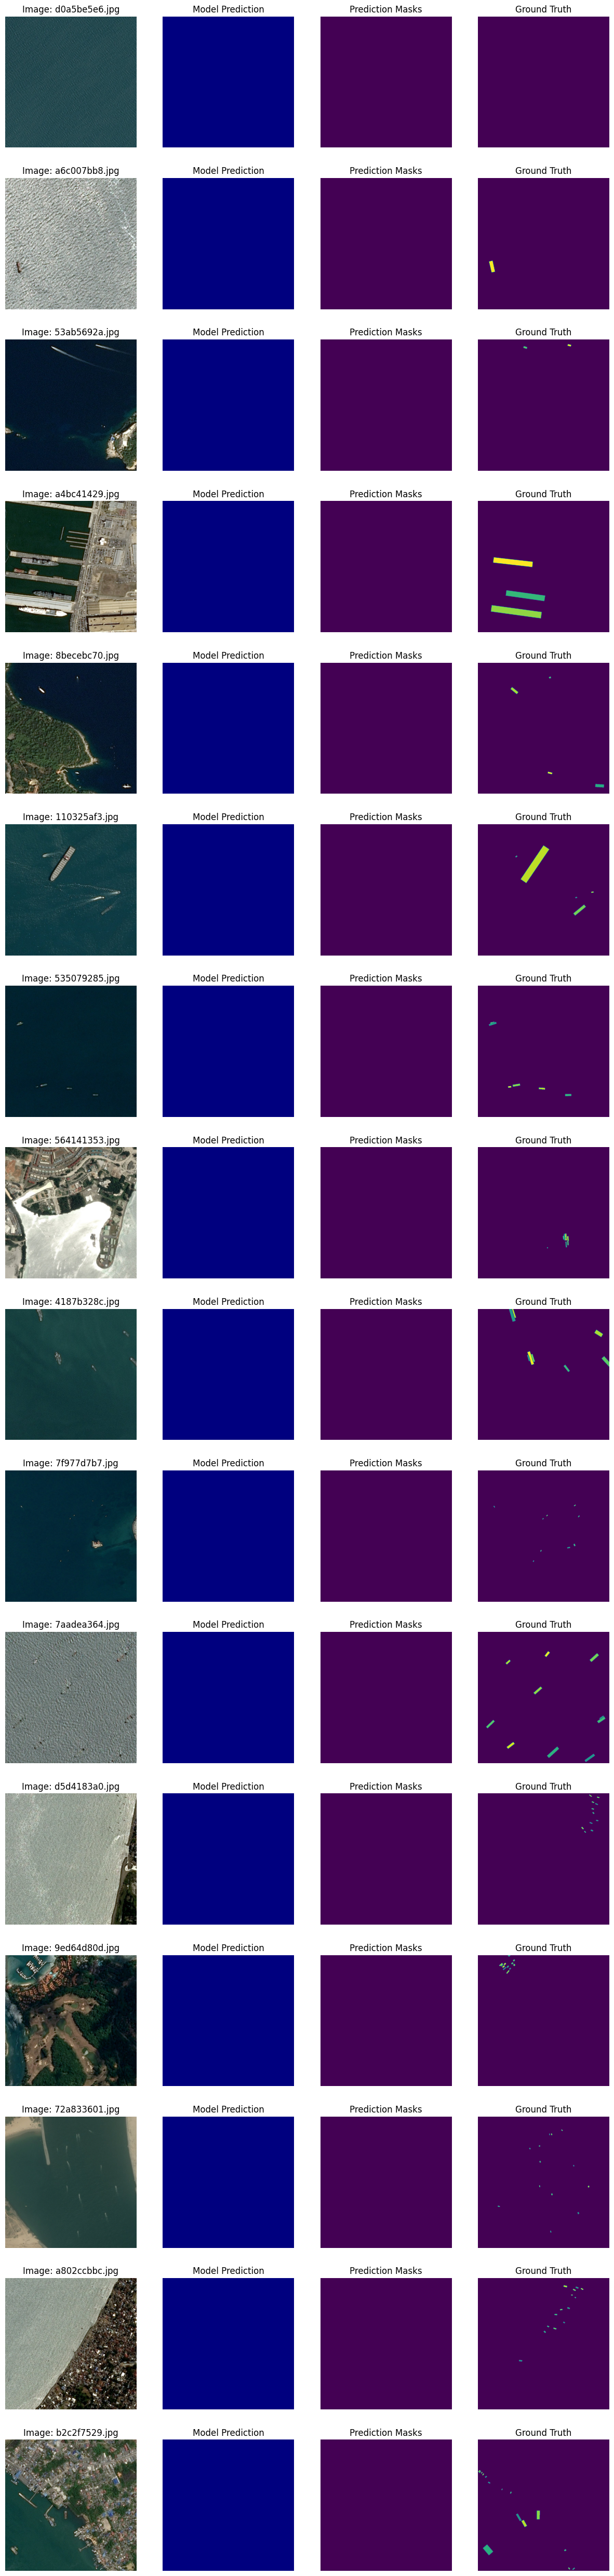

In [ ]:
def raw_prediction(img, path=test_image_dir):
    c_img = imread(os.path.join(path, c_img_name))
    c_img = np.expand_dims(c_img, 0)/255.0
    cur_seg = final_model.predict(c_img)[0]
    return cur_seg, c_img[0]
def smooth(cur_seg):
    return binary_opening(cur_seg>0.99, np.expand_dims(disk(2), -1))
def predict(img, path=test_image_dir):
    cur_seg, c_img = raw_prediction(img, path=path)
    return smooth(cur_seg), c_img
samples = valid_df.groupby('ships').apply(lambda x: x.sample(1))
fig, m_axs = plt.subplots(samples.shape[0], 4, figsize = (15, samples.shape[0]*4))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2, ax3, ax4), c_img_name in zip(m_axs, samples.ImageId.values):
    first_seg, first_img = raw_prediction(c_img_name, train_image_dir)
    ax1.imshow(first_img)
    ax1.set_title('Image: ' + c_img_name)
    ax2.imshow(first_seg[:, :, 0], cmap=get_cmap('jet'))
    ax2.set_title('Model Prediction')
    reencoded = masks_as_color(multi_rle_encode(smooth(first_seg)[:, :, 0]))
    ax3.imshow(reencoded)
    ax3.set_title('Prediction Masks')
    ground_truth = masks_as_color(masks.query('ImageId=="{}"'.format(c_img_name))['EncodedPixels'])
    ax4.imshow(ground_truth)
    ax4.set_title('Ground Truth')
fig.savefig('validation.png')

In [ ]:
test_paths = np.array(os.listdir(test_image_dir))
print(len(test_paths), 'test images found')

155 test images found


In [ ]:
pred = pd.DataFrame(out_pred_rows)
pred.columns = ['ImageId', 'EncodedPixels']
pred = pred[pred.EncodedPixels.notnull()]
pred.head()

In [ ]:
%%time
submission_final_lastattempt = pd.read_csv("/content/drive/MyDrive/DATA_255/LAB1_part3/input_dir/sample_submission.csv")
# Read the submission file
TEST_DIR='/content/drive/MyDrive/DATA_255/LAB1_part3/input_dir/Test Image/untitled folder/test images 2'

# Define a function to apply the model prediction to each row of the submission file
def set_model_prediction(row: pd.Series) -> pd.Series:
    image = cv2.imread(f'{TEST_DIR}{row["ImageId"]}')
    if image is not None and len(image) > 0:
        image = cv2.resize(image, IMG_SHAPE, interpolation=cv2.INTER_AREA)
        image = image / 255.0
        pred_mask = predict(image)
        row['EncodedPixels'] = mask_to_rle(pred_mask)
    else:
        row['EncodedPixels'] = np.nan
    return row
submission_final_lastattempt = submission_final_lastattempt.apply(lambda x: set_model_prediction(x), axis=1).set_index('ImageId')
submission_final_lastattempt.to_csv('.submission_final_lastattempt.csv')
print(submission_final_lastattempt)

               Unnamed: 0  EncodedPixels
ImageId                                 
0002756f7.jpg           0            NaN
0002756f7.jpg           1            NaN
0005d01c8.jpg           2            NaN
0005d01c8.jpg           3            NaN
0009a46e1.jpg           4            NaN
...                   ...            ...
fff77c602.jpg       37213            NaN
fff8ced35.jpg       37214            NaN
fff9395dc.jpg       37215            NaN
fffa5960e.jpg       37216            NaN
fffe4c385.jpg       37217            NaN

[37218 rows x 2 columns]
CPU times: user 7.6 s, sys: 2.13 s, total: 9.73 s
Wall time: 16.2 s


In [ ]:
submission_final_lastattempt.to_csv('/content/drive/MyDrive/DATA_255/LAB1_part3/input_dir/submission_final_lastattempt.csv', index=False)


In [ ]:
from google.colab import files

# Download the CSV file
files.download('/content/drive/MyDrive/DATA_255/LAB1_part3/input_dir/submission_final_lastattempt.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
submission_final_lastattempt = submission_final_lastattempt.reset_index(drop=True)  # Reset the index
submission_final_lastattempt = submission_final_lastattempt[['ImageId', 'EncodedPixels']]
submission_final_lastattempt.to_csv('./submission_final_lastattempt.csv', index=False)

In [ ]:
submission_final_lastattempt = submission_final_lastattempt.reset_index()
if 'ImageId' in submission_final_lastattempt.columns and 'EncodedPixels' in submission_final_lastattempt.columns:
    # Select the desired columns
    submission_final_lastattempt = submission_final_lastattempt[['ImageId', 'EncodedPixels']]
    # Write the modified submission file to disk
    submission_final_lastattempt.to_csv('./submission_final_lastattempt.csv', index=False)
else:
    print("Columns 'ImageId' and 'EncodedPixels' not found.")

Columns 'ImageId' and 'EncodedPixels' not found.


In [ ]:
print(submission_final_lastattempt.columns)


Index(['Unnamed: 0', 'EncodedPixels'], dtype='object')


In [ ]:
def show_loss(loss_history):
    epochs = np.concatenate([mh.epoch for mh in loss_history])
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))

    _ = ax1.plot(epochs, np.concatenate([mh.history['loss'] for mh in loss_history]), 'b-',
                 epochs, np.concatenate([mh.history['val_loss'] for mh in loss_history]), 'r-')
    ax1.legend(['Training', 'Validation'])
    ax1.set_title('Loss')

    _ = ax2.plot(epochs, np.concatenate([mh.history['binary_accuracy'] for mh in loss_history]), 'b-',
                 epochs, np.concatenate([mh.history['val_binary_accuracy'] for mh in loss_history]), 'r-')
    ax2.legend(['Training', 'Validation'])
    ax2.set_title('Accuracy (%)')

show_loss(loss_history)

In [ ]:
seg_model.load_weights(weight_path)
seg_model.save('seg_model.h5')

In [ ]:
pred_y = seg_model.predict(valid_x)
print(pred_y.shape, pred_y.min(axis=0).max(), pred_y.max(axis=0).min(), pred_y.mean())

In [ ]:
fullres_model = models.Sequential()
fullres_model.add(layers.AvgPool2D((3, 3), input_shape = (None, None, 3)))
fullres_model.add(seg_model)
fullres_model.add(layers.UpSampling2D((3, 3)))
fullres_model.save('final_model.h5')

Visualizing the predictions

In [ ]:
def raw_prediction(img, path=test_image_dir):
    c_img = imread(os.path.join(path, c_img_name))
    c_img = np.expand_dims(c_img, 0)/255.0
    cur_seg = fullres_model.predict(c_img)[0]
    return cur_seg, c_img[0]

def smooth(cur_seg):
    return binary_opening(cur_seg>0.99, np.expand_dims(disk(2), -1))

def predict(img, path=test_image_dir):
    cur_seg, c_img = raw_prediction(img, path=path)
    return smooth(cur_seg), c_img
samples = valid_df.groupby('ships').apply(lambda x: x.sample(1))
fig, m_axs = plt.subplots(samples.shape[0], 4, figsize = (15, samples.shape[0]*4))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2, ax3, ax4), c_img_name in zip(m_axs, samples.ImageId.values):
    first_seg, first_img = raw_prediction(c_img_name, train_image_dir)
    ax1.imshow(first_img)
    ax1.set_title('Image: ' + c_img_name)
    ax2.imshow(first_seg[:, :, 0], cmap=get_cmap('jet'))
    ax2.set_title('Model Prediction')
    reencoded = masks_as_color(multi_rle_encode(smooth(first_seg)[:, :, 0]))
    ax3.imshow(reencoded)
    ax3.set_title('Prediction Masks')
    ground_truth = masks_as_color(masks.query('ImageId=="{}"'.format(c_img_name))['EncodedPixels'])
    ax4.imshow(ground_truth)
    ax4.set_title('Ground Truth')
fig.savefig('validation.png')

Predictions:

In [ ]:
test_paths = np.array(os.listdir(test_image_dir))
print(len(test_paths), 'test images found')

In [ ]:
from tqdm import tqdm_notebook
def pred_encode(img, **kwargs):
    cur_seg, _ = predict(img)
    cur_rles = multi_rle_encode(cur_seg, **kwargs)
    return [[img, rle] for rle in cur_rles if rle is not None]
out_pred_rows = []
for c_img_name in tqdm_notebook(test_paths):
    out_pred_rows += pred_encode(c_img_name, min_max_threshold=1.0)